# <span style="color:#FFE4E1; font-weight:bold"> Image Augmentation 과제</span>

- 기존의 데이터셋 사이즈 28 x 28 x 3 으로 resizing

- 모자쓴 사진, 모자 안쓴 사진 각각 50장씩 augmentation 

## <span style="color: #FFC0CB">Data Augmentation? </span>

    데이터의 양을 늘리기 위해 원본에 각종 변환을 적용하여 개수를 증강시키는 기법 

## <span style="color: 	#FFC0CB">  << 과정 >> </span>

## <span style="color: 	#FFC0CB">1. 라이브러리 불러오기 </span>

In [96]:
import numpy as np
import os
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, load_img 
import pandas as pd
import matplotlib.pyplot as plt 

## <span style="color: 	#FFC0CB">2. 이미지 데이터 생성기 셋팅 </span>

In [9]:
datagen=ImageDataGenerator(
        rotation_range=20,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1,
        fill_mode='reflect')    

## <span style="color: 	#FFC0CB">3. 증식할 이미지 불러오기</span>

1) 모자 쓴 거

In [10]:
image_directory2 = './datasets/with/'
SIZE = 128
dataset2 = []

my_images2 = os.listdir(image_directory2)
for i, image_name in enumerate(my_images2):
    if (image_name.split('.')[1] == 'jpg'):
        image = load_img(image_directory2 + image_name)
        image = image.resize((SIZE, SIZE))
        dataset2.append(np.array(image))
        
x = np.array(dataset2)

In [11]:
my_images2

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '2.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

## <span style="color: 	#FFC0CB">4. 이미지 증식</span>

In [12]:
i = 0 
for batch in datagen.flow(x, batch_size=16,
                            save_to_dir='./datasets/with',
                            save_prefix="aug_with",
                            save_format='png'):
    i += 1
    if i > 19 :
        break

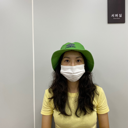

In [13]:
image

In [14]:
type(dataset2)

list

In [15]:
type(image)

PIL.Image.Image

In [16]:
type(x)

numpy.ndarray

2) 모자 안쓴 거

In [17]:
image_directory = './datasets/without/'
SIZE = 128
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = load_img(image_directory + image_name)
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        
x = np.array(dataset)

i = 0 
for batch in datagen.flow(x, batch_size=16,
                            save_to_dir="./datasets/with",
                            save_prefix="aug_without",
                            save_format='png'):
    i += 1
    if i > 29 :
        break

# Labelling

In [57]:
path = './datasets/with/'

In [58]:
filenames = os.listdir(path)

In [59]:
filenames

['with (1).jpg',
 'with (1).png',
 'with (10).jpg',
 'with (10).png',
 'with (100).png',
 'with (101).png',
 'with (102).png',
 'with (103).png',
 'with (104).png',
 'with (105).png',
 'with (106).png',
 'with (107).png',
 'with (108).png',
 'with (109).png',
 'with (11).jpg',
 'with (11).png',
 'with (110).png',
 'with (111).png',
 'with (112).png',
 'with (113).png',
 'with (114).png',
 'with (115).png',
 'with (116).png',
 'with (117).png',
 'with (118).png',
 'with (119).png',
 'with (12).jpg',
 'with (12).png',
 'with (120).png',
 'with (121).png',
 'with (122).png',
 'with (123).png',
 'with (124).png',
 'with (125).png',
 'with (126).png',
 'with (127).png',
 'with (128).png',
 'with (129).png',
 'with (13).jpg',
 'with (13).png',
 'with (130).png',
 'with (131).png',
 'with (132).png',
 'with (133).png',
 'with (134).png',
 'with (135).png',
 'with (136).png',
 'with (137).png',
 'with (138).png',
 'with (139).png',
 'with (14).jpg',
 'with (14).png',
 'with (140).png',
 'with 

In [60]:
os.getcwd()

'C:\\ai\\2021_AI\\projects'

In [61]:
categories = []
for filename in filenames:
    category = filename.split(" ")[0] # cats라는 단어만 따로 분리해서 빼옴
    # print(category)
    if category == "without":
        categories.append(0) # 0이라는 이름으로 cats를 categories 리스트에 append
    else:
        categories.append(1) # 1이라는 이름으로 dogs를 categories 리스트에 append

In [62]:
# pandas로 데이터묶어 프레임 생성
df = pd.DataFrame({"filename": filenames, "label" : categories})

In [63]:
print(df.filename)
print("-"*50)
print(df.label)

0          with (1).jpg
1          with (1).png
2         with (10).jpg
3         with (10).png
4        with (100).png
             ...       
609    without (95).png
610    without (96).png
611    without (97).png
612    without (98).png
613    without (99).png
Name: filename, Length: 614, dtype: object
--------------------------------------------------
0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    0
611    0
612    0
613    0
Name: label, Length: 614, dtype: int64


In [79]:
df['label'] = df['label'].replace({0:'without', 1:'with'})

In [80]:
df['label']

0         with
1         with
2         with
3         with
4         with
        ...   
609    without
610    without
611    without
612    without
613    without
Name: label, Length: 614, dtype: object

## 딥러닝

In [81]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

In [82]:
# 특징을 찾아가는 딥러닝 - 합성곱
# Layer 1
model = Sequential()
# 3행 3렬의 임의의 커널 생성
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(SIZE, SIZE, 3)))
model.add(BatchNormalization()) # 정규분포 재배치
model.add(MaxPooling2D(pool_size=(2,2))) # 사이즈를 1/2로 줄인 후,그 안에 값 중 가장 큰 것 뽑는다.
model.add(Dropout(0.25)) # 전체 값 중  25%는 버린다. (과적합 방지) 

# Layer 2 
model.add(Conv2D(64, (3,3), activation="relu")) # 64개의 커넬 사용?? 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Layer 3
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 마지막 단계 - 모델을 1차원 모형으로 다시 변형
# Fully Connected 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

In [83]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)       

In [84]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [85]:
earlystop = EarlyStopping(patience=10) # 10번이상 성능이 향상되지 않으면 학습 멈춘다.

In [86]:
learning_rate_reduction=ReduceLROnPlateau(
                        monitor= 'val_loss', #'val_loss'를 모니터링하면서
                        patience = 2, #2회 이상 val_loss가 줄어들지 않으면
                        factor = 0.5, #learning rate을 1/2로 줄인다.
                        min_lr=0.0001, #learning rate의 하한선 0.0001로 지정
                        verbose=1)

In [87]:
callbacks = [earlystop, learning_rate_reduction]  #케라스에서 제공하는 콜백함수 사용

In [88]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=4)
# 데이터 분할시 셔플 위한 시드값

In [89]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [90]:
train_df

,filename,label
0,with (6).png,with
1,with (285).png,with
2,without (40).png,without
3,without (167).png,without
4,without (56).png,without
...,...,...
486,without (86).png,without
487,without (14).png,without
488,without (210).png,without
489,with (249).png,with


In [91]:
print("전체 이미지 데이터 개수 : ", len(df))
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
print("검증용 전체 이미지 데이터 개수 : ", len(validate_df))

전체 이미지 데이터 개수 :  614
학습용 전체 이미지 데이터 개수 :  491
검증용 전체 이미지 데이터 개수 :  123


In [92]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [93]:
batch_size = 15

In [94]:
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "label",
    target_size = (SIZE, SIZE),
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size )

Found 491 validated image filenames belonging to 2 classes.


C:\Users\user3\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


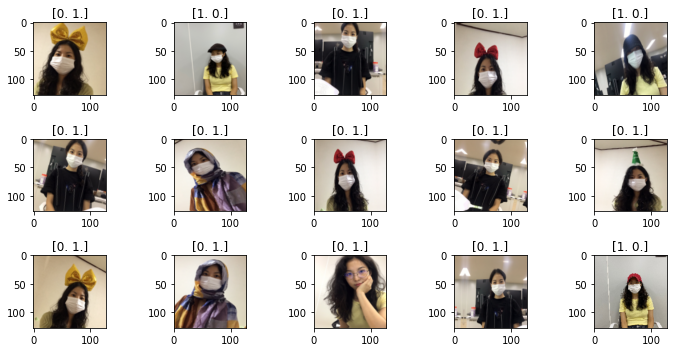

In [97]:
plt.figure(figsize=(10,5))
for i in range(0,15): 
    plt.subplot(3, 5, i+1) # matlab에서 첫번째 플롯을 가리키는 숫자가 0이 아닌 1부터 이다!! 주의할 것 
    for x,y in train_generator:
        # print(x[1]) # x[0] ~ x[14] 사이의 값. rgb 픽셀값
        # print(y[14]) # y[0] ~ y[14] 사이의 값. 레이블링 값
        image = x[0] # random data 
        plt.imshow(image)
        plt.title(y[0]) 
        # 위에서 제너레이터 생성시 원핫인코딩으로 했으므로 결과도 원핫인코딩으로 레이블링 되어야 함
        break
plt.tight_layout()
plt.show()

In [98]:
validate_datagen = ImageDataGenerator(rescale=1./255)  #0~1 사이로 변경

In [100]:
validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "label",
    target_size = (SIZE, SIZE),
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size)

Found 123 validated image filenames belonging to 2 classes.


C:\Users\user3\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


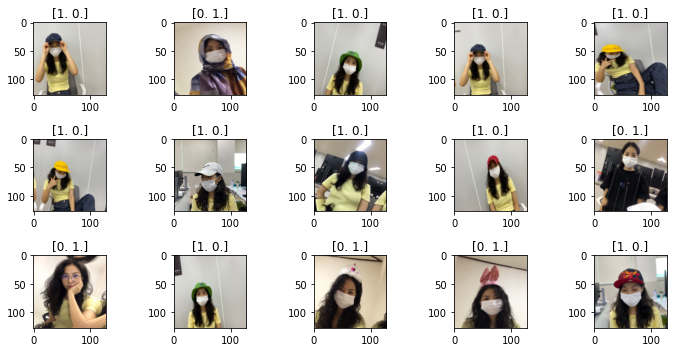

In [101]:
plt.figure(figsize=(10,5))
for i in range(0,15): 
    plt.subplot(3, 5, i+1) # matlab에서 첫번째 플롯을 가리키는 숫자가 0이 아닌 1부터 이다!! 주의할 것 
    for x,y in train_generator:
        # print(x[1]) # x[0] ~ x[14] 사이의 값. rgb 픽셀값
        # print(y[14]) # y[0] ~ y[14] 사이의 값. 레이블링 값
        image = x[0] # random data 
        plt.imshow(image)
        plt.title(y[0]) 
        # 위에서 제너레이터 생성시 원핫인코딩으로 했으므로 결과도 원핫인코딩으로 레이블링 되어야 함
        break
plt.tight_layout()
plt.show()

In [102]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,label
0,without (202).png,without


In [104]:
example_generator=train_datagen.flow_from_dataframe(
    example_df, 
    path,
    x_col = "filename", 
    y_col = "label",
    target_size = (SIZE, SIZE),
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size )

Found 1 validated image filenames belonging to 1 classes.


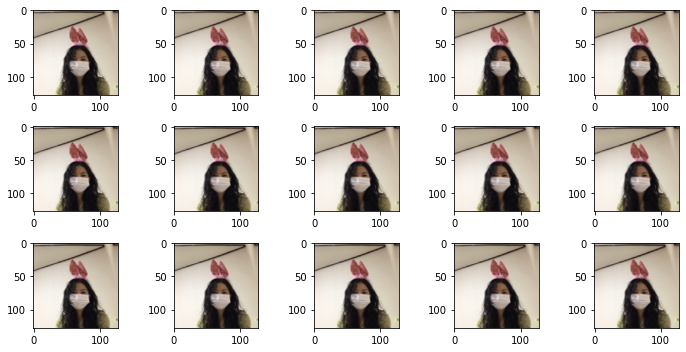

In [105]:
plt.figure(figsize=(10,5))
for i in range(0,15):
    plt.subplot(3,5,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [106]:
# 딥러닝 실행

In [108]:
total_train = train_df.shape[0]

In [109]:
total_train

491

In [110]:
total_valid = validate_df.shape[0]

In [111]:
total_valid

123

In [112]:
epochs = 20

history = model.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,  # total_train(1600개) / batch_size(15개) = 106.6666 증식
    validation_data=  validation_generator, 
    validation_steps = total_valid//batch_size,  # total_validate(400개) / batch_size(15개) = 26.6666 증식
)

# 모델 저장 
model.save_weights("model.h5")

Epoch 1/50
32/32 [==============================] - 14s 439ms/step - loss: 0.2231 - accuracy: 0.9454 - val_loss: 8.1389 - val_accuracy: 0.5167
Epoch 2/50
32/32 [==============================] - 13s 396ms/step - loss: 0.0362 - accuracy: 0.9853 - val_loss: 17.4663 - val_accuracy: 0.5278
Epoch 3/50
32/32 [==============================] - 13s 396ms/step - loss: 0.0310 - accuracy: 0.9874 - val_loss: 25.6098 - val_accuracy: 0.5741
Epoch 4/50
32/32 [==============================] - 13s 420ms/step - loss: 0.0090 - accuracy: 0.9958 - val_loss: 15.4602 - val_accuracy: 0.4722
Epoch 5/50
32/32 [==============================] - 13s 402ms/step - loss: 0.0090 - accuracy: 0.9958 - val_loss: 15.9354 - val_accuracy: 0.5093
Epoch 6/50
32/32 [==============================] - 13s 392ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 27.6985 - val_accuracy: 0.5370
Epoch 7/50
32/32 [==============================] - 12s 385ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 18.4449 - val_accuracy: 

In [113]:
historyDict = history.history

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [115]:
epo = range(1, len(acc)+1)
print(epo)

range(1, 51)


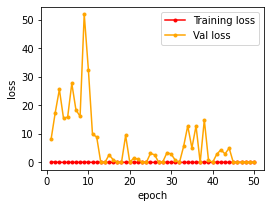

In [116]:
plt.figure(figsize=(4,3))
epo = range(1, len(acc)+1)
plt.plot(epo, loss, marker = '.', color='red', label='Training loss') # 학습데이터 기반 loss는 비교적 안정적
plt.plot(epo, val_loss, marker = '.', color='orange', label='Val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

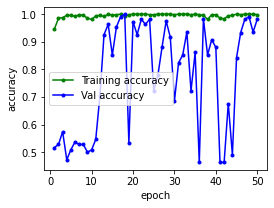

In [117]:
plt.figure(figsize=(4,3))
epo = range(1, len(acc)+1)
plt.plot(epo, acc, marker = '.', color='green', label='Training accuracy') # 학습데이터 기반 loss는 비교적 안정적
plt.plot(epo, val_acc, marker = '.', color='blue', label='Val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [146]:
os.getcwd()

'C:\\ai\\2021_AI\\projects\\datasets\\with'

In [148]:
os.chdir('../')

In [149]:
os.getcwd()

'C:\\ai\\2021_AI\\projects\\datasets'

In [150]:
os.chdir('./with')

In [151]:
os.getcwd()

'C:\\ai\\2021_AI\\projects\\datasets\\with'

In [154]:
test_path1 = os.getcwd()

In [155]:
filenames1 = os.listdir(test_path1)

In [156]:
test_df = pd.DataFrame({"filename" : filenames1})

In [157]:
# 방식2
test_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [159]:
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    test_path1,
    x_col= "filename",
    y_col= None,
    target_size = (SIZE, SIZE),
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)


Found 614 validated image filenames.


In [161]:
predict=model.predict_generator(test_generator,     
                                steps=10, # 추가된 부분 
                                callbacks=callbacks)

In [162]:
print('테스트 이미지 개수 :', len(predict))

테스트 이미지 개수 : 150


In [163]:
result = np.argmax(predict, axis=1)

In [165]:
cnt = 1
for i in range(len(predict)):
    if result[i] == 0:
        print(cnt, "번째 이미지 예측 결과 :", result[i], ", without_hat ")
    else:
        print(cnt, "번째 이미지 예측 결과 :", result[i], ", with_hat ")
    cnt += 1

1 번째 이미지 예측 결과 : 0 , without_hat 
2 번째 이미지 예측 결과 : 0 , without_hat 
3 번째 이미지 예측 결과 : 0 , without_hat 
4 번째 이미지 예측 결과 : 0 , without_hat 
5 번째 이미지 예측 결과 : 0 , without_hat 
6 번째 이미지 예측 결과 : 0 , without_hat 
7 번째 이미지 예측 결과 : 0 , without_hat 
8 번째 이미지 예측 결과 : 0 , without_hat 
9 번째 이미지 예측 결과 : 0 , without_hat 
10 번째 이미지 예측 결과 : 0 , without_hat 
11 번째 이미지 예측 결과 : 0 , without_hat 
12 번째 이미지 예측 결과 : 0 , without_hat 
13 번째 이미지 예측 결과 : 0 , without_hat 
14 번째 이미지 예측 결과 : 0 , without_hat 
15 번째 이미지 예측 결과 : 0 , without_hat 
16 번째 이미지 예측 결과 : 0 , without_hat 
17 번째 이미지 예측 결과 : 0 , without_hat 
18 번째 이미지 예측 결과 : 0 , without_hat 
19 번째 이미지 예측 결과 : 0 , without_hat 
20 번째 이미지 예측 결과 : 0 , without_hat 
21 번째 이미지 예측 결과 : 0 , without_hat 
22 번째 이미지 예측 결과 : 0 , without_hat 
23 번째 이미지 예측 결과 : 0 , without_hat 
24 번째 이미지 예측 결과 : 0 , without_hat 
25 번째 이미지 예측 결과 : 0 , without_hat 
26 번째 이미지 예측 결과 : 0 , without_hat 
27 번째 이미지 예측 결과 : 0 , without_hat 
28 번째 이미지 예측 결과 : 0 , without_hat 
29 번째 이미지 예측 결과 : 0 , without